In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
zip_path = '/content/drive/MyDrive/Prjct123.zip'

import zipfile
import os

extract_path = '/content/drive/MyDrive'  # Directory where files will be extracted
os.makedirs(extract_path, exist_ok=True)  # Create the directory if it doesn't exist

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Files extracted to: {extract_path}")


Files extracted to: /content/drive/MyDrive


In [ ]:
import cv2
import os

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Set the input and output paths
input_videos_path = '/content/Prjct5_vids'  # Change this to your video folder path
output_frames_path = '/content/drive/My Drive/Prjct5_frms/'    # Change this to your desired output path

# Create the output directory if it doesn't exist
os.makedirs(output_frames_path, exist_ok=True)

# Function to extract 2 frames per second
def extract_frames(video_path, output_dir, target_fps=2):
    cap = cv2.VideoCapture(video_path)
    original_fps = int(cap.get(cv2.CAP_PROP_FPS))  # Get the video's original frame rate
    frame_skip = max(original_fps // target_fps, 1)  # Calculate how many frames to skip
    print(f"Original FPS: {original_fps}, Extracting {target_fps} FPS (Skip {frame_skip} frames)")

    count = 0
    extracted_count = 0
    success, frame = cap.read()

    while success:
        if count % frame_skip == 0:  # Save only every `frame_skip` frame
            frame_name = os.path.join(output_dir, f"frame_{extracted_count:04d}.jpg")
            cv2.imwrite(frame_name, frame)
            extracted_count += 1
        count += 1
        success, frame = cap.read()

    cap.release()
    print(f"Extracted {extracted_count} frames from {video_path}")

# Iterate over all videos in the folder
for video_file in os.listdir(input_videos_path):
    if video_file.endswith('.mp4') or video_file.endswith('.avi'):  # Update extensions based on your video formats
        video_path = os.path.join(input_videos_path, video_file)
        video_output_dir = os.path.join(output_frames_path, os.path.splitext(video_file)[0])
        os.makedirs(video_output_dir, exist_ok=True)
        extract_frames(video_path, video_output_dir, target_fps=2)

print("Frame extraction completed.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Original FPS: 30, Extracting 2 FPS (Skip 15 frames)
Extracted 69 frames from /content/Prjct5_vids/24024_Video_1_TubuloVillous_LGD_JNet_2A.mp4
Original FPS: 30, Extracting 2 FPS (Skip 15 frames)
Extracted 121 frames from /content/Prjct5_vids/24018_Video_1_Hyperplastic_JNet_1.mp4
Original FPS: 30, Extracting 2 FPS (Skip 15 frames)
Extracted 144 frames from /content/Prjct5_vids/23030_Video_1_Villous_HGD_JNet_2B.mp4
Original FPS: 30, Extracting 2 FPS (Skip 15 frames)
Extracted 71 frames from /content/Prjct5_vids/23006_Video_1_TubuloVillous_LGD_JNet_2A.mp4
Original FPS: 30, Extracting 2 FPS (Skip 15 frames)
Extracted 105 frames from /content/Prjct5_vids/23100_Video_1.mp4
Original FPS: 30, Extracting 2 FPS (Skip 15 frames)
Extracted 71 frames from /content/Prjct5_vids/23019_Video_1_Tubular_LGD_JNet_2A.mp4
Original FPS: 30, Extracting 2 FPS (Skip 15 frames)
Extracte

In [ ]:
cap = cv2.VideoCapture('/content/Prjct5_vids/24024_Video_1_TubuloVillous_LGD_JNet_2A.mp4')
fps = int(cap.get(cv2.CAP_PROP_FPS))
print(f"Frames per second: {fps}")


Frames per second: 30


In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Path to your dataset
dataset_path = '/content/drive/MyDrive/Prjct3'  # Main folder containing all images and subfolders
output_path = '/content/drive/MyDrive/Prjct3_split'  # Output folder for split datasets

# Create output directories
train_path = os.path.join(output_path, 'train')
val_path = os.path.join(output_path, 'val')
test_path = os.path.join(output_path, 'test')

os.makedirs(train_path, exist_ok=True)
os.makedirs(val_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)

# Gather all images from all subdirectories
image_paths = []
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith(('.jpg', '.png')):  # Add other image formats if needed
            image_paths.append(os.path.join(root, file))

# Split the dataset into train, test, and validation sets
train_files, test_files = train_test_split(image_paths, test_size=0.2, random_state=42)
train_files, val_files = train_test_split(train_files, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Move files into respective directories
for file in train_files:
    category = os.path.basename(os.path.dirname(file))  # Get the folder name (category)
    category_path = os.path.join(train_path, category)
    os.makedirs(category_path, exist_ok=True)
    shutil.copy(file, os.path.join(category_path, os.path.basename(file)))

for file in val_files:
    category = os.path.basename(os.path.dirname(file))  # Get the folder name (category)
    category_path = os.path.join(val_path, category)
    os.makedirs(category_path, exist_ok=True)
    shutil.copy(file, os.path.join(category_path, os.path.basename(file)))

for file in test_files:
    category = os.path.basename(os.path.dirname(file))  # Get the folder name (category)
    category_path = os.path.join(test_path, category)
    os.makedirs(category_path, exist_ok=True)
    shutil.copy(file, os.path.join(category_path, os.path.basename(file)))

print("Dataset split completed:")
print(f"Train: {len(train_files)} images")
print(f"Validation: {len(val_files)} images")
print(f"Test: {len(test_files)} images")


Dataset split completed:
Train: 2858 images
Validation: 953 images
Test: 953 images


In [ ]:
import pandas as pd

# Load metadata CSV file
metadata_path = '/content/drive/MyDrive/Polyps.csv'
metadata = pd.read_csv(metadata_path)

# Display the first few rows of the metadata
print(metadata.head())


   Patient_ID  Age  Size_cm Recurrence  Sex_F  Sex_M  \
0       23002   76      0.5         No      0      1   
1       23003   66      0.5        Yes      1      0   
2       23004   50      0.5        Yes      1      0   
3       23005   73      0.5        Yes      1      0   
4       23006   82      0.5        Yes      0      1   

   Polyp_Location_ Descending  Polyp_Location_ Sigmoid  \
0                           0                        0   
1                           0                        0   
2                           0                        0   
3                           0                        0   
4                           0                        0   

   Polyp_Location_ Splenic Flexure  Polyp_Location_Anastomosis  ...  \
0                                0                           0  ...   
1                                0                           0  ...   
2                                0                           0  ...   
3                             

In [ ]:
import os
import shutil

# Define the root directory for the dataset
root_dir = '/content/drive/MyDrive/Prjct3_split'

# Define the subfolders to process (train, test, val)
subfolders = ['train', 'test', 'val']

# Loop through each subfolder
for subfolder in subfolders:
    subfolder_path = os.path.join(root_dir, subfolder)

    # Process video frame folders
    for item in os.listdir(subfolder_path):
        item_path = os.path.join(subfolder_path, item)

        # If item is a frame folder (e.g., 23001_Video_1_Tubular_LGD_JNet_2A)
        if os.path.isdir(item_path) and "Video" in item:
            # Extract Patient_ID from the folder name (assumes naming like 23001_Video_1_Tubular_LGD_JNet_2A)
            patient_id = item.split('_')[0]
            patient_folder = os.path.join(subfolder_path, patient_id)

            # Ensure the patient folder exists
            os.makedirs(patient_folder, exist_ok=True)

            # Move all frames from the video folder into the patient folder
            for frame in os.listdir(item_path):
                frame_path = os.path.join(item_path, frame)
                shutil.move(frame_path, os.path.join(patient_folder, frame))

            # Remove the now-empty video folder
            shutil.rmtree(item_path)

        # If item is the Prjct3 folder (contains standalone images)
        elif os.path.isdir(item_path) and item == 'Prjct3':
            for img_file in os.listdir(item_path):
                # Extract Patient_ID from the image filename (e.g., 23005_11_Villous_HGD_JNet_2B.jpg)
                patient_id = img_file.split('_')[0]
                patient_folder = os.path.join(subfolder_path, patient_id)

                # Ensure the patient folder exists
                os.makedirs(patient_folder, exist_ok=True)

                # Move the image into the corresponding patient folder
                shutil.move(os.path.join(item_path, img_file), os.path.join(patient_folder, img_file))

            # Remove the empty Prjct3 folder after processing
            shutil.rmtree(item_path)


In [ ]:
import os

# Root directory containing train, test, and val splits
root_dir = '/content/drive/MyDrive/Prjct3_split'

# Function to list all image paths along with Patient_ID
def list_image_paths(root_dir):
    image_data = []
    for split in ['train', 'test', 'val']:  # Include val in the splits
        split_path = os.path.join(root_dir, split)
        for patient_id in os.listdir(split_path):
            patient_folder = os.path.join(split_path, patient_id)
            if os.path.isdir(patient_folder):  # Ensure it's a folder
                for filename in os.listdir(patient_folder):
                    if filename.endswith(('.jpg', '.png')):  # Include only image files
                        file_path = os.path.join(patient_folder, filename)
                        image_data.append({'Patient_ID': int(patient_id), 'File_Path': file_path, 'Split': split})
    return image_data

# Generate the list of image paths
image_paths = list_image_paths(root_dir)


In [ ]:
import pandas as pd

# Convert image paths to a DataFrame
image_df = pd.DataFrame(image_paths)

# Display the first few rows
print(image_df.head())


   Patient_ID                                          File_Path  Split
0       23094  /content/drive/MyDrive/Prjct3_split/train/2309...  train
1       23094  /content/drive/MyDrive/Prjct3_split/train/2309...  train
2       23094  /content/drive/MyDrive/Prjct3_split/train/2309...  train
3       23094  /content/drive/MyDrive/Prjct3_split/train/2309...  train
4       23094  /content/drive/MyDrive/Prjct3_split/train/2309...  train


In [ ]:


# Merge image data with metadata on Patient_ID
linked_data = pd.merge(metadata, image_df, on='Patient_ID', how='inner')

# Display the linked dataset
print(linked_data.head())


   Patient_ID  Age  Size_cm Recurrence  Sex_F  Sex_M  \
0       23002   76      0.5         No      0      1   
1       23002   76      0.5         No      0      1   
2       23002   76      0.5         No      0      1   
3       23002   76      0.5         No      0      1   
4       23002   76      0.5         No      0      1   

   Polyp_Location_ Descending  Polyp_Location_ Sigmoid  \
0                           0                        0   
1                           0                        0   
2                           0                        0   
3                           0                        0   
4                           0                        0   

   Polyp_Location_ Splenic Flexure  Polyp_Location_Anastomosis  ...  \
0                                0                           0  ...   
1                                0                           0  ...   
2                                0                           0  ...   
3                             

In [ ]:
linked_data.shape


(4727, 83)

In [ ]:
# Save the linked data to a CSV file
linked_data.to_csv('linked_metadata_with_images_and_split.csv', index=False)

print("Linked data saved successfully.")


Linked data saved successfully.


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
linked_data['Age'] = scaler.fit_transform(linked_data[['Age']])


NameError: name 'linked_data' is not defined

In [ ]:
linked_data.head()

,Patient_ID,Age,Size_cm,Recurrence,Sex_F,Sex_M,Polyp_Location_ Descending,Polyp_Location_ Sigmoid,Polyp_Location_ Splenic Flexure,Polyp_Location_Anastomosis,...,Diagnosis_Tubular,Diagnosis_Villous,Dysplasia_Grade_Differentiation_HGD,Dysplasia_Grade_Differentiation_LGD,Dysplasia_Grade_Differentiation_Mod Diff\nOrigin: Tubulovillous,Dysplasia_Grade_Differentiation_Mod: Well Diff \nOrigin: Tubulovillous,Dysplasia_Grade_Differentiation_T + V,Dysplasia_Grade_Differentiation_Well Diff,File_Path,Split
0,23002,0.762712,0.5,No,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,/content/drive/MyDrive/Prjct3_split/train/2300...,train
1,23002,0.762712,0.5,No,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,/content/drive/MyDrive/Prjct3_split/train/2300...,train
2,23002,0.762712,0.5,No,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,/content/drive/MyDrive/Prjct3_split/train/2300...,train
3,23002,0.762712,0.5,No,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,/content/drive/MyDrive/Prjct3_split/train/2300...,train
4,23002,0.762712,0.5,No,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,/content/drive/MyDrive/Prjct3_split/train/2300...,train


In [ ]:
linked_data['Size_cm'] = scaler.fit_transform(linked_data[['Size_cm']])


NameError: name 'scaler' is not defined

In [ ]:
import pandas as pd

# Update the path to your file
file_path = '/content/drive/MyDrive/Linked_metadata_with_images_and_split.csv'

# Read the CSV file
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())


   Patient_ID       Age   Size_cm Recurrence  Sex_F  Sex_M  \
0       23002  0.762712  0.042553         No      0      1   
1       23002  0.762712  0.042553         No      0      1   
2       23002  0.762712  0.042553         No      0      1   
3       23002  0.762712  0.042553         No      0      1   
4       23002  0.762712  0.042553         No      0      1   

   Polyp_Location_ Descending  Polyp_Location_ Sigmoid  \
0                           0                        0   
1                           0                        0   
2                           0                        0   
3                           0                        0   
4                           0                        0   

   Polyp_Location_ Splenic Flexure  Polyp_Location_Anastomosis  ...  \
0                                0                           0  ...   
1                                0                           0  ...   
2                                0                           0  .

In [ ]:
!pip install pillow


In [ ]:
import os
from PIL import Image
import numpy as np
import pandas as pd

# Load the linked dataset
#linked_data_path = 'Linked_metadata_with_images_and_split.csv'  # Your file name
linked_data = pd.read_csv(file_path)

# Define preprocessing parameters
image_size = (224, 224)  # Resize to 224x224

# Process and overwrite images
for index, row in linked_data.iterrows():
    try:
        # Get the image path from the File_Path column
        image_path = row['File_Path']

        # Ensure the file exists
        if os.path.exists(image_path):
            # Open the image
            img = Image.open(image_path)

            # Resize the image
            img_resized = img.resize(image_size)

            # Convert to NumPy array and normalize pixel values
            img_array = np.array(img_resized) / 255.0  # Normalize to [0, 1]

            # Convert back to Image format for saving
            img_normalized = Image.fromarray((img_array * 255).astype(np.uint8))

            # Overwrite the original image with the normalized and resized version
            img_normalized.save(image_path)
        else:
            print(f"Image not found: {image_path}")
    except Exception as e:
        print(f"Error processing image {row['File_Path']}: {e}")

print("All images have been resized, normalized, and saved in place.")


All images have been resized, normalized, and saved in place.


In [ ]:

# Check pixel values of a sample image
sample_image_path = linked_data['File_Path'][4700]
sample_image = Image.open(sample_image_path)
sample_array = np.array(sample_image) / 255.0

# Check the size of the image
width, height = sample_image.size
print(f"Image size: {width}x{height}")

print(f"Pixel range: Min={sample_array.min()}, Max={sample_array.max()}")


Image size: 224x224
Pixel range: Min=0.0, Max=1.0


In [ ]:
linked_data

,Patient_ID,Age,Size_cm,Recurrence,Sex_F,Sex_M,Polyp_Location_ Descending,Polyp_Location_ Sigmoid,Polyp_Location_ Splenic Flexure,Polyp_Location_Anastomosis,...,Diagnosis_Tubular,Diagnosis_Villous,Dysplasia_Grade_Differentiation_HGD,Dysplasia_Grade_Differentiation_LGD,Dysplasia_Grade_Differentiation_Mod Diff\nOrigin: Tubulovillous,Dysplasia_Grade_Differentiation_Mod: Well Diff \nOrigin: Tubulovillous,Dysplasia_Grade_Differentiation_T + V,Dysplasia_Grade_Differentiation_Well Diff,File_Path,Split
0,23002,0.762712,0.042553,No,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,/content/drive/MyDrive/Prjct3_split/train/2300...,train
1,23002,0.762712,0.042553,No,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,/content/drive/MyDrive/Prjct3_split/train/2300...,train
2,23002,0.762712,0.042553,No,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,/content/drive/MyDrive/Prjct3_split/train/2300...,train
3,23002,0.762712,0.042553,No,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,/content/drive/MyDrive/Prjct3_split/train/2300...,train
4,23002,0.762712,0.042553,No,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,/content/drive/MyDrive/Prjct3_split/train/2300...,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4722,24025,0.610169,0.042553,No,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,/content/drive/MyDrive/Prjct3_split/val/24025/...,val
4723,24025,0.610169,0.042553,No,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,/content/drive/MyDrive/Prjct3_split/val/24025/...,val
4724,24025,0.610169,0.042553,No,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,/content/drive/MyDrive/Prjct3_split/val/24025/...,val
4725,24025,0.610169,0.042553,No,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,/content/drive/MyDrive/Prjct3_split/val/24025/...,val


In [ ]:
# Separate the datasets based on the 'Split' column
train_data = linked_data[linked_data['Split'] == 'train']
val_data = linked_data[linked_data['Split'] == 'val']
test_data = linked_data[linked_data['Split'] == 'test']


In [ ]:
# File paths to save the datasets
train_file_path = '/content/drive/My Drive/Train_data.csv'
val_file_path = '/content/drive/My Drive/Val_data.csv'
test_file_path = '/content/drive/My Drive/Test_data.csv'

# Save the DataFrames as CSV files
train_data.to_csv(train_file_path, index=False)
val_data.to_csv(val_file_path, index=False)
test_data.to_csv(test_file_path, index=False)

In [ ]:
from transformers import ViTFeatureExtractor, TFViTModel

# Load the feature extractor and pre-trained Vision Transformer model
feature_extractor = ViTFeatureExtractor.from_pretrained("google/vit-base-patch16-224")
vit_model = TFViTModel.from_pretrained("google/vit-base-patch16-224")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFViTModel: ['classifier.weight', 'classifier.bias']
- This IS expected if you are initializing TFViTModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFViTModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFViTModel were not initialized from the PyTorch model and are newly initialized: ['vit.pooler.dense.weight', 'vit.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
import numpy as np
from PIL import Image
from transformers import ViTFeatureExtractor, TFViTModel

# Initialize the feature extractor and model
feature_extractor = ViTFeatureExtractor.from_pretrained("google/vit-base-patch16-224")
vit_model = TFViTModel.from_pretrained("google/vit-base-patch16-224")

# Function to extract features from an image using ViT
def extract_image_features_vit(image_path):
    try:
        # Load the image
        img = Image.open(image_path).convert("RGB")  # Ensure RGB mode

        # Preprocess the image using the feature extractor
        inputs = feature_extractor(images=img, return_tensors="tf")

        # Extract features using the ViT model
        outputs = vit_model(**inputs)

        # The last hidden state contains the feature representation
        features = outputs.last_hidden_state[:, 0, :]  # [CLS] token features
        return features.numpy().flatten()
    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return None

# Example: Process train_data
train_image_features = [
    extract_image_features_vit(image_path) for image_path in train_data['File_Path']
]
train_image_features_array = np.array(train_image_features)

print(f"Train Image Features Shape: {train_image_features_array.shape}")


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFViTModel: ['classifier.weight', 'classifier.bias']
- This IS expected if you are initializing TFViTModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFViTModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFViTModel were not initialized from the PyTorch model and are newly initialized: ['vit.pooler.dense.weight', 'vit.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Train Image Features Shape: (2834, 768)


In [ ]:
# Extract features for the validation dataset
val_image_features = [
    extract_image_features_vit(path) for path in val_data['File_Path']
]
val_image_features_array = np.array(val_image_features)

# Extract features for the test dataset
test_image_features = [
    extract_image_features_vit(path) for path in test_data['File_Path']
]
test_image_features_array = np.array(test_image_features)

# Print shapes for verification
print(f"Train Image Features Shape: {train_image_features_array.shape}")
print(f"Validation Image Features Shape: {val_image_features_array.shape}")
print(f"Test Image Features Shape: {test_image_features_array.shape}")


Train Image Features Shape: (2834, 768)
Validation Image Features Shape: (944, 768)
Test Image Features Shape: (949, 768)


In [ ]:
# Display first 5 feature vectors
print(train_image_features_array[:5])


[[-0.96192694  0.66871303 -0.62741053 ...  0.46968886 -0.7429037
   1.1048813 ]
 [-0.02369304  0.39457262  0.49856305 ...  0.47989172 -0.32174906
  -0.12345481]
 [-0.03381375  0.90789086  0.25042972 ...  0.6521583  -0.17982997
   0.47285175]
 [ 0.34584653  0.4377279   0.6706386  ...  0.10392771 -0.56712735
   0.70838094]
 [-0.10946992  0.6939498  -1.1630985  ...  0.13433088 -0.81483126
   0.6840557 ]]


In [ ]:
np.save('/content/drive/MyDrive/train_image_features.npy', train_image_features_array)
np.save('/content/drive/MyDrive/val_image_features.npy', val_image_features_array)
np.save('/content/drive/MyDrive/test_image_features.npy', test_image_features_array)

print("Feature arrays saved successfully.")


Feature arrays saved successfully.


In [ ]:
import pandas as pd


# Get all column headings
column_headings = linked_data.columns.tolist()
print("Column Headings:", column_headings)


Column Headings: ['Patient_ID', 'Age', 'Size_cm', 'Recurrence', 'Sex_F', 'Sex_M', 'Polyp_Location_ Descending', 'Polyp_Location_ Sigmoid', 'Polyp_Location_ Splenic Flexure', 'Polyp_Location_Anastomosis', 'Polyp_Location_Asc / Transverse ?', 'Polyp_Location_Ascending', 'Polyp_Location_Cecum', 'Polyp_Location_Cecum\nKissing Polyps', 'Polyp_Location_Descending', 'Polyp_Location_Descending ', 'Polyp_Location_Hepatic Flexure', 'Polyp_Location_Ileocecal Valve', 'Polyp_Location_Ileocecal Valve\nKissing Polyps', 'Polyp_Location_Rectosigmoid', 'Polyp_Location_Rectosigmoid ', 'Polyp_Location_Rectum', 'Polyp_Location_Sigmoid', 'Polyp_Location_Sigmoid, Splenic Flexure', 'Polyp_Location_Splenic Flexure', 'Polyp_Location_Transvers Colon', 'Polyp_Location_Transverse', 'Circum_0.3333333333333333', 'Circum_<1/3', 'Circum_>1/3', 'Cross_Two_Folds_Between Folds', 'Cross_Two_Folds_Neg', 'Cross_Two_Folds_On Fold', 'Cross_Two_Folds_On Fold ', 'Cross_Two_Folds_Pos', 'Paris_0-IIa', 'Paris_0-IIa + IIc', 'Paris_

In [ ]:
import numpy as np

# Select relevant metadata columns
metadata_columns = ['Age', 'Size_cm', 'Sex_F', 'Sex_M', 'Polyp_Location_ Descending', 'Polyp_Location_ Sigmoid', 'Polyp_Location_ Splenic Flexure', 'Polyp_Location_Anastomosis', 'Polyp_Location_Asc / Transverse ?', 'Polyp_Location_Ascending', 'Polyp_Location_Cecum', 'Polyp_Location_Cecum\nKissing Polyps', 'Polyp_Location_Descending', 'Polyp_Location_Descending ', 'Polyp_Location_Hepatic Flexure', 'Polyp_Location_Ileocecal Valve', 'Polyp_Location_Ileocecal Valve\nKissing Polyps', 'Polyp_Location_Rectosigmoid', 'Polyp_Location_Rectosigmoid ', 'Polyp_Location_Rectum', 'Polyp_Location_Sigmoid', 'Polyp_Location_Sigmoid, Splenic Flexure', 'Polyp_Location_Splenic Flexure', 'Polyp_Location_Transvers Colon', 'Polyp_Location_Transverse', 'Circum_0.3333333333333333', 'Circum_<1/3', 'Circum_>1/3', 'Cross_Two_Folds_Between Folds', 'Cross_Two_Folds_Neg', 'Cross_Two_Folds_On Fold', 'Cross_Two_Folds_On Fold ', 'Cross_Two_Folds_Pos', 'Paris_0-IIa', 'Paris_0-IIa + IIc', 'Paris_0-IIa + Is', 'Paris_0-IIa /c', 'Paris_0-IIb', 'Paris_0-Ip', 'Paris_0-Ips', 'Paris_0-Is', 'Paris_0-lps', 'Paris_0-ls', 'LST_Type_LST DT', 'LST_Type_LST-G HT', 'LST_Type_LST-G MN', 'LST_Type_LST-NG FT', 'LST_Type_LST-NG PD', 'Pit_2A', 'Pit_2B', 'Pit_I', 'Pit_II', 'Pit_III', 'Pit_III, IV', 'Pit_III, IV, V', 'Pit_III, V', 'Pit_IIIs', 'Pit_IV', 'Pit_IV, V', 'Pit_V', 'JNET_1', 'JNET_2A', 'JNET_2B', 'JNET_3', 'Diagnosis_Adenocarcinoma', 'Diagnosis_Hyperplastic', 'Diagnosis_Inflammatory', 'Diagnosis_Serrated', 'Diagnosis_Serrated, Hyperplastic', 'Diagnosis_T + V', 'Diagnosis_Traditional Serrated Adenoma', 'Diagnosis_Tubular', 'Diagnosis_Villous', 'Dysplasia_Grade_Differentiation_HGD', 'Dysplasia_Grade_Differentiation_LGD', 'Dysplasia_Grade_Differentiation_Mod Diff\nOrigin: Tubulovillous', 'Dysplasia_Grade_Differentiation_Mod: Well Diff \nOrigin: Tubulovillous', 'Dysplasia_Grade_Differentiation_T + V', 'Dysplasia_Grade_Differentiation_Well Diff']

# Replace with actual column names

# Extract metadata features for each dataset
train_metadata = train_data[metadata_columns].values
val_metadata = val_data[metadata_columns].values
test_metadata = test_data[metadata_columns].values

# Print shapes for verification
print(f"Train Metadata Shape: {train_metadata.shape}")
print(f"Validation Metadata Shape: {val_metadata.shape}")
print(f"Test Metadata Shape: {test_metadata.shape}")


Train Metadata Shape: (2834, 79)
Validation Metadata Shape: (944, 79)
Test Metadata Shape: (949, 79)


In [ ]:
train_metadata = train_metadata.astype('float32')
val_metadata = val_metadata.astype('float32')
test_metadata = test_metadata.astype('float32')

In [ ]:
# Save the metadata arrays
np.save('/content/drive/MyDrive/train_metadata.npy', train_metadata)
np.save('/content/drive/MyDrive/val_metadata.npy', val_metadata)
np.save('/content/drive/MyDrive/test_metadata.npy', test_metadata)

In [ ]:
# Combine metadata and image features
train_combined_features = np.hstack((train_metadata, train_image_features_array))
val_combined_features = np.hstack((val_metadata, val_image_features_array))
test_combined_features = np.hstack((test_metadata, test_image_features_array))

# Print shapes for verification
print(f"Train Combined Features Shape: {train_combined_features.shape}")
print(f"Validation Combined Features Shape: {val_combined_features.shape}")
print(f"Test Combined Features Shape: {test_combined_features.shape}")


Train Combined Features Shape: (2834, 847)
Validation Combined Features Shape: (944, 847)
Test Combined Features Shape: (949, 847)


In [ ]:
# Extract target labels
y_train = train_data['Recurrence'].map({'Yes': 1, 'No': 0}).values
y_val = val_data['Recurrence'].map({'Yes': 1, 'No': 0}).values
y_test = test_data['Recurrence'].map({'Yes': 1, 'No': 0}).values

# Verify the unique values to confirm conversion
print("Unique values in y_train:", set(y_train))
print("Unique values in y_val:", set(y_val))
print("Unique values in y_test:", set(y_test))



Unique values in y_train: {0, 1}
Unique values in y_val: {0, 1}
Unique values in y_test: {0, 1}


In [ ]:
# Display first 5 feature vectors
print(train_combined_features[:5])

[[ 0.76271186  0.04255319  0.         ...  0.46968886 -0.74290371
   1.10488129]
 [ 0.76271186  0.04255319  0.         ...  0.47989172 -0.32174906
  -0.12345481]
 [ 0.76271186  0.04255319  0.         ...  0.65215832 -0.17982997
   0.47285175]
 [ 0.76271186  0.04255319  0.         ...  0.10392771 -0.56712735
   0.70838094]
 [ 0.76271186  0.04255319  0.         ...  0.13433088 -0.81483126
   0.68405569]]


In [ ]:
print(f"Train Metadata Shape: {train_metadata.shape}")
print(f"Train Image Features Shape: {train_image_features_array.shape}")
print(f"Train Labels Shape: {y_train.shape}")


Train Metadata Shape: (2834, 79)
Train Image Features Shape: (2834, 768)
Train Labels Shape: (2834,)


In [ ]:
print(train_metadata.dtype)
print(train_image_features_array.dtype)

float32
float32


Epoch 1/20, Train Loss: 0.3175, Train Accuracy: 0.8677, Validation Loss: 0.0585, Validation Accuracy: 0.9873
Epoch 2/20, Train Loss: 0.0247, Train Accuracy: 0.9954, Validation Loss: 0.0096, Validation Accuracy: 0.9989
Epoch 3/20, Train Loss: 0.0065, Train Accuracy: 0.9989, Validation Loss: 0.0063, Validation Accuracy: 0.9989
Epoch 4/20, Train Loss: 0.0045, Train Accuracy: 0.9989, Validation Loss: 0.0042, Validation Accuracy: 0.9989
Epoch 5/20, Train Loss: 0.0019, Train Accuracy: 0.9996, Validation Loss: 0.0031, Validation Accuracy: 0.9989
Epoch 6/20, Train Loss: 0.0013, Train Accuracy: 0.9996, Validation Loss: 0.0025, Validation Accuracy: 0.9989
Epoch 7/20, Train Loss: 0.0008, Train Accuracy: 1.0000, Validation Loss: 0.0022, Validation Accuracy: 0.9989
Epoch 8/20, Train Loss: 0.0006, Train Accuracy: 1.0000, Validation Loss: 0.0020, Validation Accuracy: 0.9989
Epoch 9/20, Train Loss: 0.0006, Train Accuracy: 1.0000, Validation Loss: 0.0018, Validation Accuracy: 0.9989
Epoch 10/20, Train 

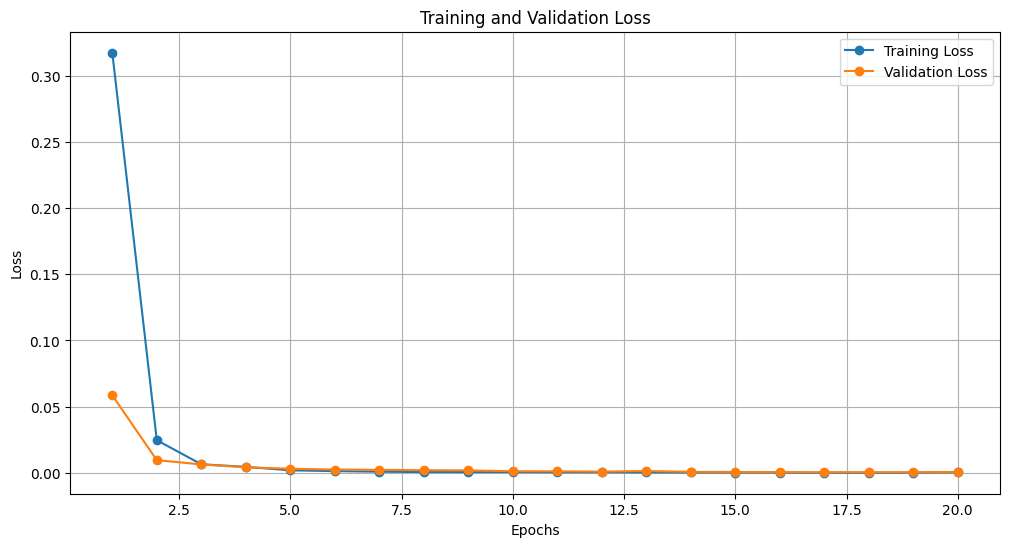

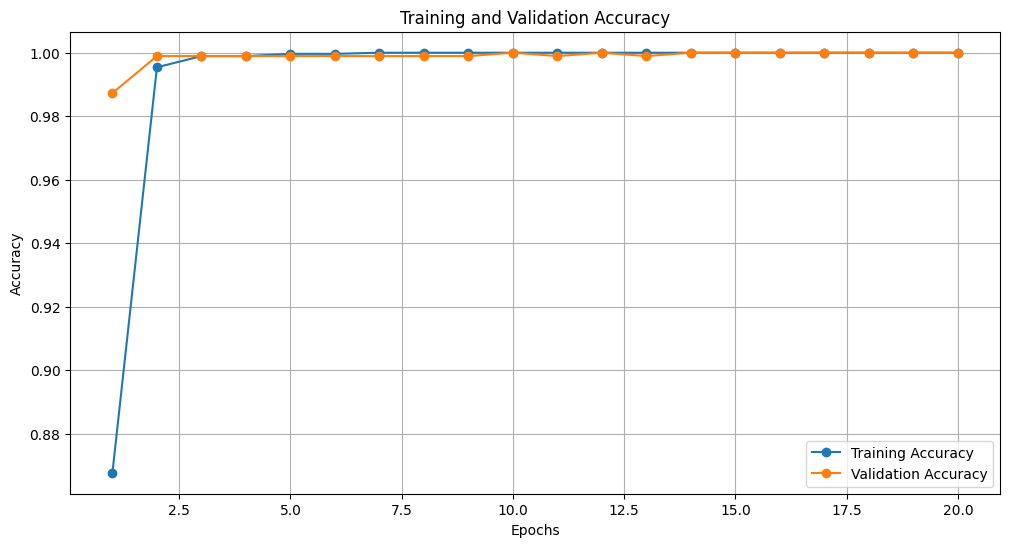

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

# Define the PyTorch model
class FusionModel(nn.Module):
    def __init__(self, metadata_dim, image_dim):
        super(FusionModel, self).__init__()
        # Metadata branch
        self.metadata_branch = nn.Sequential(
            nn.Linear(metadata_dim, 64),  # Equivalent to Dense(64)
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 32),  # Equivalent to Dense(32)
            nn.ReLU()
        )
        # Image branch
        self.image_branch = nn.Sequential(
            nn.Linear(image_dim, 128),  # Equivalent to Dense(128)
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),  # Equivalent to Dense(64)
            nn.ReLU()
        )
        # Fusion layer
        self.fusion_layer = nn.Linear(32 + 64, 1)  # Concatenate outputs and map to single output
        self.output = nn.Sigmoid()  # Equivalent to Dense(1, activation='sigmoid')

    def forward(self, metadata_input, image_input):
        # Process metadata and image inputs through their branches
        metadata_features = self.metadata_branch(metadata_input)
        image_features = self.image_branch(image_input)
        # Concatenate features
        fusion_features = torch.cat((metadata_features, image_features), dim=1)
        # Final output
        out = self.output(self.fusion_layer(fusion_features))
        return out

# Model parameters
metadata_dim = 79  # Number of metadata features
image_dim = 768  # Dimension of image features
model = FusionModel(metadata_dim, image_dim)

# Define loss and optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Convert data to PyTorch tensors
train_metadata_tensor = torch.tensor(train_metadata, dtype=torch.float32)
train_image_tensor = torch.tensor(train_image_features_array, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)

val_metadata_tensor = torch.tensor(val_metadata, dtype=torch.float32)
val_image_tensor = torch.tensor(val_image_features_array, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).unsqueeze(1)

# Create DataLoader for training
train_dataset = TensorDataset(train_metadata_tensor, train_image_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

val_dataset = TensorDataset(val_metadata_tensor, val_image_tensor, y_val_tensor)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

import matplotlib.pyplot as plt

# Lists to store training and validation metrics
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Training loop
epochs = 20
for epoch in range(epochs):
    model.train()
    train_loss = 0
    correct_train = 0
    total_train = 0
    for metadata_batch, image_batch, target_batch in train_loader:
        # Forward pass
        output = model(metadata_batch, image_batch)
        loss = criterion(output, target_batch)
        train_loss += loss.item()

        # Calculate accuracy
        preds = (output >= 0.5).float()  # Threshold at 0.5
        correct_train += (preds == target_batch).sum().item()
        total_train += target_batch.size(0)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    train_accuracy = correct_train / total_train
    train_losses.append(train_loss / len(train_loader))
    train_accuracies.append(train_accuracy)

    # Validation loop
    model.eval()
    val_loss = 0
    correct_val = 0
    total_val = 0
    with torch.no_grad():
        for metadata_batch, image_batch, target_batch in val_loader:
            output = model(metadata_batch, image_batch)
            loss = criterion(output, target_batch)
            val_loss += loss.item()

            # Calculate accuracy
            preds = (output >= 0.5).float()  # Threshold at 0.5
            correct_val += (preds == target_batch).sum().item()
            total_val += target_batch.size(0)

    val_accuracy = correct_val / total_val
    val_losses.append(val_loss / len(val_loader))
    val_accuracies.append(val_accuracy)

    # Print loss and accuracy for this epoch
    print(f"Epoch {epoch+1}/{epochs}, "
          f"Train Loss: {train_losses[-1]:.4f}, Train Accuracy: {train_accuracies[-1]:.4f}, "
          f"Validation Loss: {val_losses[-1]:.4f}, Validation Accuracy: {val_accuracies[-1]:.4f}")

# Final metrics
print(f"\nFinal Training Loss: {train_losses[-1]:.4f}")
print(f"Final Training Accuracy: {train_accuracies[-1]:.4f}")
print(f"Final Validation Loss: {val_losses[-1]:.4f}")
print(f"Final Validation Accuracy: {val_accuracies[-1]:.4f}")

# Plot Loss Curves
plt.figure(figsize=(12, 6))
plt.plot(range(1, epochs+1), train_losses, label='Training Loss', marker='o')
plt.plot(range(1, epochs+1), val_losses, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# Plot Accuracy Curves
plt.figure(figsize=(12, 6))
plt.plot(range(1, epochs+1), train_accuracies, label='Training Accuracy', marker='o')
plt.plot(range(1, epochs+1), val_accuracies, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()


Test Loss: 0.0019
Test Accuracy: 0.9989
Test Precision: 0.9953
Test Recall: 1.0000
Test F1-Score: 0.9977


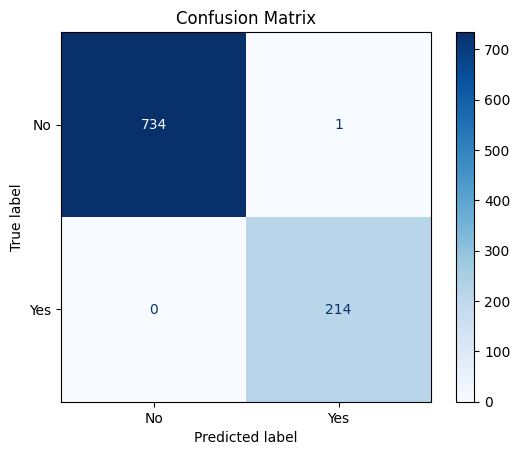

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Initialize lists to store true labels and predictions
true_labels = []
predicted_labels = []

# Evaluate on the test set
model.eval()  # Set the model to evaluation mode
test_loss = 0

with torch.no_grad():  # Disable gradient computation
    for metadata_batch, image_batch, target_batch in test_loader:
        # Forward pass
        output = model(metadata_batch, image_batch)
        loss = criterion(output, target_batch)
        test_loss += loss.item()

        # Threshold predictions at 0.5
        preds = (output >= 0.5).float()

        # Store predictions and true labels
        predicted_labels.extend(preds.cpu().numpy())
        true_labels.extend(target_batch.cpu().numpy())

# Calculate average loss
test_loss /= len(test_loader)

# Convert to NumPy arrays for metric calculations
true_labels = np.array(true_labels).flatten()
predicted_labels = np.array(predicted_labels).flatten()

# Calculate metrics
test_accuracy = accuracy_score(true_labels, predicted_labels)
test_precision = precision_score(true_labels, predicted_labels)
test_recall = recall_score(true_labels, predicted_labels)
test_f1 = f1_score(true_labels, predicted_labels)

# Print results
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F1-Score: {test_f1:.4f}")

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No", "Yes"])  # Replace with your class names
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()
